In [2]:
import pandas as pd
import yfinance as yf

In [3]:
tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
tsla

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2021-11-01,402.863342,403.250000,372.886658,381.666656,168146100
2021-11-02,390.666656,402.863342,382.000000,386.453339,128213400
2021-11-03,404.619995,405.130005,384.206665,392.443329,103885500
2021-11-04,409.970001,414.496674,405.666656,411.470001,76192200
2021-11-05,407.363342,413.290009,402.666656,409.333344,64886400
...,...,...,...,...,...
2023-03-24,190.410004,192.360001,187.149994,191.649994,116312400
2023-03-27,191.809998,197.389999,189.940002,194.419998,120851600


In [5]:
tsla.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [6]:
tsla.index

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12',
               ...
               '2023-03-17', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30'],
              dtype='datetime64[ns]', name='Date', length=355, freq=None)

In [7]:
# 시계열에서는 무조건 판다스 to_datetime을 사용

In [8]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

In [9]:
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [10]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [11]:
# df.set_index() 활용

In [12]:
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [13]:
pd.to_datetime(1490195805, unit='s')

Timestamp('2017-03-22 15:16:45')

In [14]:
pd.to_datetime(1490195805433502912, unit='ns')

Timestamp('2017-03-22 15:16:45.433502912')

In [15]:
pd.to_datetime([1, 2, 3], unit='D',
               origin=pd.Timestamp('1960-01-01'))

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

In [16]:
pd.to_datetime('2018-10-26 12:00:00.0000000011',
               format='%Y-%m-%d %H:%M:%S.%f')

Timestamp('2018-10-26 12:00:00.000000001')

In [17]:
pd.to_datetime(['2018-10-26 12:00:00', '2018-10-26 13:00:15'])

DatetimeIndex(['2018-10-26 12:00:00', '2018-10-26 13:00:15'], dtype='datetime64[ns]', freq=None)

In [18]:
pd.to_datetime(['2018-10-26 12:00 -0500', '2018-10-26 13:00 -0500'])

DatetimeIndex(['2018-10-26 12:00:00-05:00', '2018-10-26 13:00:00-05:00'], dtype='datetime64[ns, UTC-05:00]', freq=None)

In [19]:
from datetime import datetime

In [20]:
pd.to_datetime(["2020-01-01 01:00:00-01:00",
                datetime(2020, 1, 1, 3, 0)])

C:\Users\mbc\AppData\Local\Temp\ipykernel_14732\2025126351.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  pd.to_datetime(["2020-01-01 01:00:00-01:00",


Index([2020-01-01 01:00:00-01:00, 2020-01-01 03:00:00], dtype='object')

In [21]:
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla.head()

Ticker,TSLA
Date,
2021-11-01,402.863342
2021-11-02,390.666656
2021-11-03,404.619995
2021-11-04,409.970001
2021-11-05,407.363342


In [22]:
df_tsla.index

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12',
               ...
               '2023-03-17', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24', '2023-03-27', '2023-03-28',
               '2023-03-29', '2023-03-30'],
              dtype='datetime64[ns]', name='Date', length=355, freq=None)

In [23]:
df_tsla = df_tsla.reset_index()

In [24]:
df_tsla.head()

Ticker,Date,TSLA
0,2021-11-01,402.863342
1,2021-11-02,390.666656
2,2021-11-03,404.619995
3,2021-11-04,409.970001
4,2021-11-05,407.363342


In [25]:
df_tsla.columns = ['date', 'value']

In [26]:
df_tsla.head()

,date,value
0,2021-11-01,402.863342
1,2021-11-02,390.666656
2,2021-11-03,404.619995
3,2021-11-04,409.970001
4,2021-11-05,407.363342


In [30]:
df_tsla['date']

0     2021-11-01
1     2021-11-02
2     2021-11-03
3     2021-11-04
4     2021-11-05
         ...    
350   2023-03-24
351   2023-03-27
352   2023-03-28
353   2023-03-29
354   2023-03-30
Name: date, Length: 355, dtype: datetime64[ns]

In [31]:
df_tsla.index

RangeIndex(start=0, stop=355, step=1)

In [32]:
df_tsla['date'] = pd.to_datetime(df_tsla['date'])

In [38]:
df_tsla.head(10)

,date,value
0,2021-11-01,402.863342
1,2021-11-02,390.666656
2,2021-11-03,404.619995
3,2021-11-04,409.970001
4,2021-11-05,407.363342
5,2021-11-08,387.646667
6,2021-11-09,341.166656
7,2021-11-10,355.983337
8,2021-11-11,354.503326
9,2021-11-12,344.473328


In [34]:
import matplotlib.pyplot as plt

In [35]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    355 non-null    datetime64[ns]
 1   value   355 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [37]:
df_tsla.tail()

,date,value
350,2023-03-24,190.410004
351,2023-03-27,191.809998
352,2023-03-28,189.190002
353,2023-03-29,193.880005
354,2023-03-30,195.279999


In [40]:
len(df_tsla) * 0.8 , len(df_tsla) * 0.2

(284.0, 71.0)

In [41]:
df_tsla_train = pd.DataFrame(df_tsla['value'][:int(0.8*len(df_tsla))])
df_tsla_test = pd.DataFrame(df_tsla['value'][int(0.8*len(df_tsla)):])

In [42]:
len(df_tsla_train), len(df_tsla_test)

(284, 71)

In [43]:
df_tsla_train.shape

(284, 1)

In [44]:
df_tsla_train.head()

,value
0,402.863342
1,390.666656
2,404.619995
3,409.970001
4,407.363342


In [45]:
df_tsla['date']

0     2021-11-01
1     2021-11-02
2     2021-11-03
3     2021-11-04
4     2021-11-05
         ...    
350   2023-03-24
351   2023-03-27
352   2023-03-28
353   2023-03-29
354   2023-03-30
Name: date, Length: 355, dtype: datetime64[ns]

In [46]:
df_tsla_train['date'] = df_tsla['date'][:int(0.8*len(df_tsla))]

In [47]:
len(df_tsla_train['date'])

284

In [48]:
df_tsla_train.shape

(284, 2)

In [49]:
df_tsla_train.head()

,value,date
0,402.863342,2021-11-01
1,390.666656,2021-11-02
2,404.619995,2021-11-03
3,409.970001,2021-11-04
4,407.363342,2021-11-05


In [50]:
df_tsla_test['date'] = df_tsla['date'][int(0.8*len(df_tsla)):]

In [51]:
df_tsla_test.shape

(71, 2)

In [52]:
df_tsla_train.set_index('date', inplace=True)
df_tsla_test.set_index('date', inplace=True)

In [53]:
df_tsla_train.index

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12',
               ...
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15'],
              dtype='datetime64[ns]', name='date', length=284, freq=None)

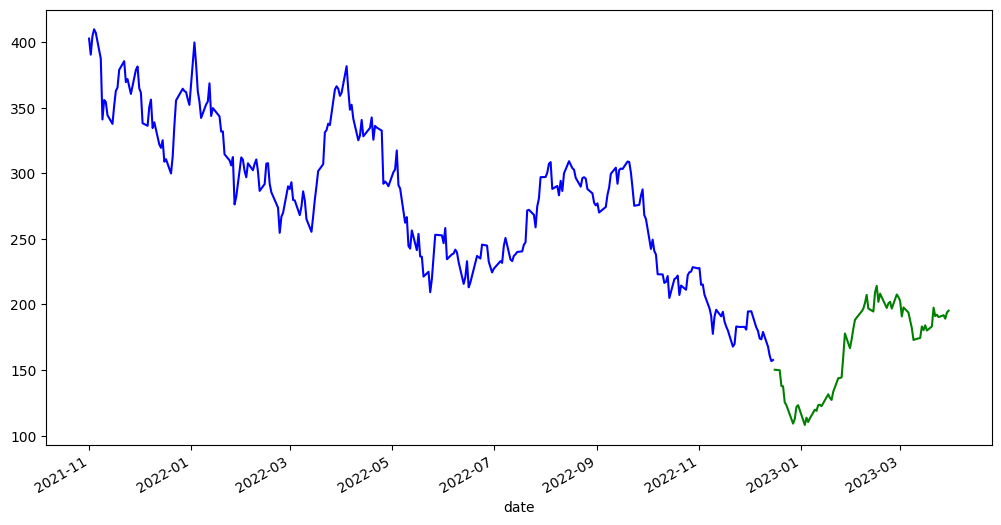

In [54]:
df_tsla_train['value'].plot(figsize=(12.2, 6.4), color='blue')
df_tsla_test['value'].plot(color='green')
plt.show()

In [55]:
from pmdarima.arima import ndiffs, nsdiffs

In [58]:
# d(차분 회수)

In [56]:
print(f"최적의 차분 횟수 (ADF): {ndiffs(df_tsla_train, test='adf')}")


최적의 차분 횟수 (ADF): 1


In [59]:
# 개발자인 Kwiatkowski, Phillips, Schmidt, Shin 네 학자의 성
# 통계학자 Peter C. B. Phillips와 Pierre Perron의 이름을 따서 명명

In [57]:
print(f"최적의 차분 횟수 (KPSS): {ndiffs(df_tsla_train, test='kpss')}")
print(f"최적의 차분 횟수 (PP): {ndiffs(df_tsla_train, test='pp')}")

최적의 차분 횟수 (KPSS): 1
최적의 차분 횟수 (PP): 1


In [60]:
# 데이터에 계절성이 존재하는지 간단히 확인해보기.


In [ ]:
# Estimate the seasonal differencing term

# Perform a test of seasonality for different levels of D to estimate the number of seasonal differences required to make a given time series stationary. Will select the maximum value of D for which the time series is judged seasonally stationary by the statistical test.

In [61]:
# m
# The number of seasonal periods (i.e., frequency of the time series)

In [62]:
print(f"최적의 차분 계수 (OSCB): {nsdiffs(df_tsla_train, m=12, test='ocsb')}")
print(f"최적의 차분 계수 (CH): {nsdiffs(df_tsla_train, m=12, test='ch')}")


최적의 차분 계수 (OSCB): 0
최적의 차분 계수 (CH): 0


In [63]:
# m=12로 지정하여 OCSB 알고리즘으로 검정한 결과 최적의 차분 계수가 0이므로 계절성이 없음.
# CH 알고리즘으로 검정한 결과도 마찬가지로 계절성이 없으므로 테슬라 데이터에서는 계절성이 검출되지 않음.


In [64]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [65]:
n_diffs = 1

In [67]:
# start_p=0, max_p=2: AR(자기회귀) 차수 p를 0부터 2까지 탐색
# start_q=0, max_q=2: MA(이동평균) 차수 q를 0부터 2까지 탐색
# m=1, seasonal=False: 계절성이 없는 데이터로 설정
# stepwise=True: 단계적 알고리즘을 사용하여 효율적으로 최적 모형 탐색
# trace=True: 탐색 과정을 출력하여 확인 가능

In [66]:
model_fit = pm.auto_arima(
    y=df_tsla_train['value'],
    d=n_diffs,
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    m=1, seasonal=False, #데이터에 계절성이 없음
    stepwise=True,
    trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2197.802, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2199.194, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2199.177, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2197.357, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2200.676, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.283 seconds


In [69]:
# 데이터가 1차 차분만으로 정상성을 만족하며, 추가적인 AR이나 MA 항이 필요 없는 단순한 구조임을 의미

In [70]:
# Log Likelihood=-1097.679 (높을수록 좋음)

In [68]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1097.679
Date:                Wed, 07 Jan 2026   AIC                           2197.357
Time:                        13:05:29   BIC                           2201.003
Sample:                             0   HQIC                          2198.819
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       136.9497      8.602     15.920      0.000     120.089     153.810
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                29.69
Prob(Q):                              0.43   Pr

In [71]:
# sigma2=136.95는 잔차의 분산 추정치

In [ ]:
# Ljung-Box (Q=0.61, p=0.43): 잔차에 자기상관 없음 (p>0.05, 양호)

In [72]:
# Jarque-Bera (JB=29.69, p=0.00): 잔차가 정규분포를 따르지 않음 (문제)

In [ ]:
# Heteroskedasticity (H=0.34, p=0.00): 이분산성 존재 (문제)

In [73]:
# Skew=-0.17, Kurtosis=4.55: 약간 왼쪽 치우침, 꼬리가 두꺼움

In [74]:
# 모델이 단순하지만 잔차의 정규성과 등분산성 가정을 만족하지 못해 예측 구간의 신뢰도가 낮을 수 있습니다.